In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import GPy
import my_lib
import acquisitions as ac
from sklearn import preprocessing
import os
from contextlib import redirect_stdout
%matplotlib inline

In [8]:
def f(x):
    return 1.0*np.sin(x*10)
np.random.seed(46)
X = np.random.rand(4)
Y = f(X)
X_array = np.linspace(0, 1, 100)

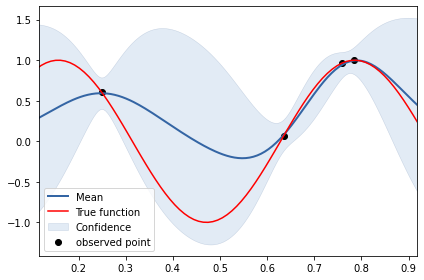

In [9]:
m = GPy.models.GPRegression(X[:,None],Y[:,None])
m.Gaussian_noise.variance = abs(0.01)
m.Gaussian_noise.variance.fix()
with redirect_stdout(open(os.devnull, 'w')):
    m.optimize_restarts(num_restarts=100, messages=False, max_iters=10)
m.plot_f()
plt.scatter(X, Y, c ='black', label ='observed point')
plt.plot(X_array, f(X_array), c='r', label='True function')
plt.legend()

In [10]:
mu, std = np.array(m.predict(X_array[:, None]))

In [11]:
PI  = ac.AcquisitionEI()
EI  = ac.AcquisitionPI()
UCB = ac.AcquisitionGPUCB()

In [14]:
mms = preprocessing.MinMaxScaler()
pi  = mms.fit_transform(PI.acq(mu, std))
pi_idx = np.argmax(pi)
ei  = mms.fit_transform(EI.acq(mu, std))
ei_idx = np.argmax(ei)
ucb = mms.fit_transform(UCB.acq(mu, std))
ucb_idx = np.argmax(ucb)

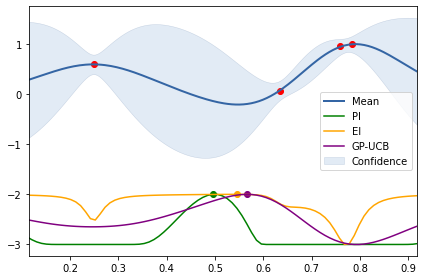

In [21]:
m.plot_f()
plt.scatter(X, Y, c ='r')

plt.plot(X_array, pi-3, c='g', label='PI')
plt.plot(X_array, ei-3, c='orange', label='EI')
plt.plot(X_array, ucb-3,c='purple', label='GP-UCB')

plt.scatter(X_array[pi_idx], pi[pi_idx]-3, c='g')
plt.scatter(X_array[ei_idx], ei[ei_idx]-3, c='orange')
plt.scatter(X_array[ucb_idx], ucb[ucb_idx]-3, c='purple')

plt.legend()